In [19]:
from models.ffnn import BrainFFNN
from models.vgg import BrainVGG
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
ffnn = BrainFFNN()

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [21]:
ffnn.train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
# hist = ffnn.train(epochs=12)
loaded = True
try:
    ffnn.load()
except:
    hist = ffnn.train(epochs=12)
    loaded = False

In [23]:
ffnn.eval()

41/41 [==============================] - 0s 6ms/step - loss: 15.8647 - accuracy: 0.7719


In [24]:
X1 = [(x[0],x[1]) for x in ffnn.test_ds.as_numpy_iterator()]

X, labels = np.array(X1[0][0]), np.array(X1[0][1])

for i in range(1, len(X1)):
    X = np.concatenate((X, X1[i][0]))
    labels = np.concatenate((labels, X1[i][1]))
    
prediction_probabilities = ffnn.model.predict(X)
predicted_labels = prediction_probabilities.argmax(axis=1)

41/41 [==============================] - 0s 4ms/step


In [25]:
ffnn_output = classification_report(predicted_labels, labels, output_dict=True)
print(classification_report(predicted_labels, labels))

              precision    recall  f1-score   support

           0       0.43      0.87      0.57       147
           1       0.64      0.67      0.65       292
           2       1.00      0.74      0.85       541
           3       0.95      0.86      0.91       331

    accuracy                           0.77      1311
   macro avg       0.75      0.79      0.75      1311
weighted avg       0.84      0.77      0.79      1311



In [26]:
def plot_results(output, class_names, title):
    measurements = [("precision", "Precision"), ("recall", "Recall"), ("f1-score", "F1 Score")]
    classes = class_names
    data = [[] for i in range(len(measurements))]

    for i in range(len(classes)):
        classNumber = str(i)
        for measurement_i in range(len(measurements)):
            data[measurement_i].append(output[classNumber][measurements[measurement_i][0]])

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    fig.suptitle(title, fontsize=16)
    for measurement_i in range(len(measurements)):
        curr_ax = ax[measurement_i]
        measurement = measurements[measurement_i]
        curr_ax.bar(classes, data[measurement_i])
        curr_ax.set_ylim(0,1)
        curr_ax.set_title(measurement[1])
        curr_ax.set_xlabel("Label")
        curr_ax.set_ylabel("Score")
    plt.plot()

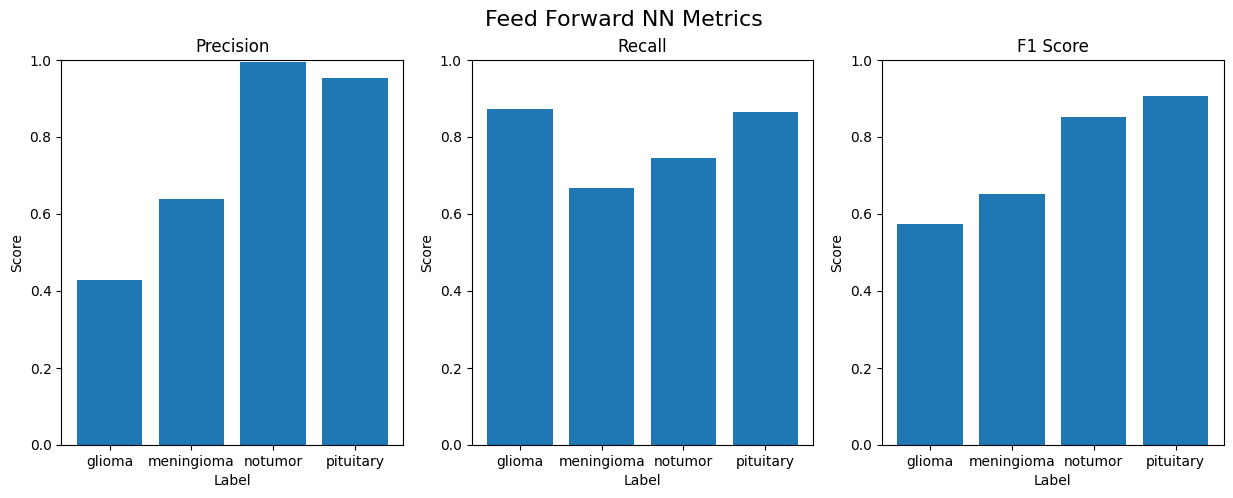

In [27]:
plot_results(ffnn_output, ffnn.test_ds.class_names, "Feed Forward NN Metrics")

In [28]:
# Only has the data to show hist if weights were not loaded
if not loaded:
    pd.DataFrame(hist.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

In [29]:
ffnn.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               16777472  
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 16810884 (64.13 MB)
Trainable params: 16810884 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
if not loaded:
    ffnn.save()

In [31]:
vgg = BrainVGG()

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [32]:
loaded = True
try:
    vgg.load()
except:
    hist = vgg.train(epochs=10)
    loaded = False

In [33]:
if not loaded:
    pd.DataFrame(hist.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

In [34]:
vgg.model.summary()
if not loaded:
    vgg.save()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      640       
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [35]:
X1 = [(x[0],x[1]) for x in vgg.test_ds.as_numpy_iterator()]

X, labels = np.array(X1[0][0]), np.array(X1[0][1])

for i in range(1, len(X1)):
    X = np.concatenate((X, X1[i][0]))
    labels = np.concatenate((labels, X1[i][1]))
    
prediction_probabilities = vgg.model.predict(X)
predicted_labels = prediction_probabilities.argmax(axis=1)

41/41 [==============================] - 137s 3s/step


In [36]:
# Generates a classification report on the first batch of images
output = classification_report(labels, predicted_labels, output_dict=True)
print(classification_report(labels, predicted_labels))

print(output)

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       300
           1       0.73      0.72      0.73       306
           2       0.87      0.99      0.93       405
           3       0.90      0.97      0.93       300

    accuracy                           0.86      1311
   macro avg       0.86      0.85      0.85      1311
weighted avg       0.86      0.86      0.86      1311

{'0': {'precision': 0.9517543859649122, 'recall': 0.7233333333333334, 'f1-score': 0.821969696969697, 'support': 300.0}, '1': {'precision': 0.7348993288590604, 'recall': 0.7156862745098039, 'f1-score': 0.7251655629139073, 'support': 306.0}, '2': {'precision': 0.8714596949891068, 'recall': 0.9876543209876543, 'f1-score': 0.9259259259259259, 'support': 405.0}, '3': {'precision': 0.8957055214723927, 'recall': 0.9733333333333334, 'f1-score': 0.9329073482428115, 'support': 300.0}, 'accuracy': 0.8604118993135011, 'macro avg': {'precision': 0.8634547328213681, 'recal

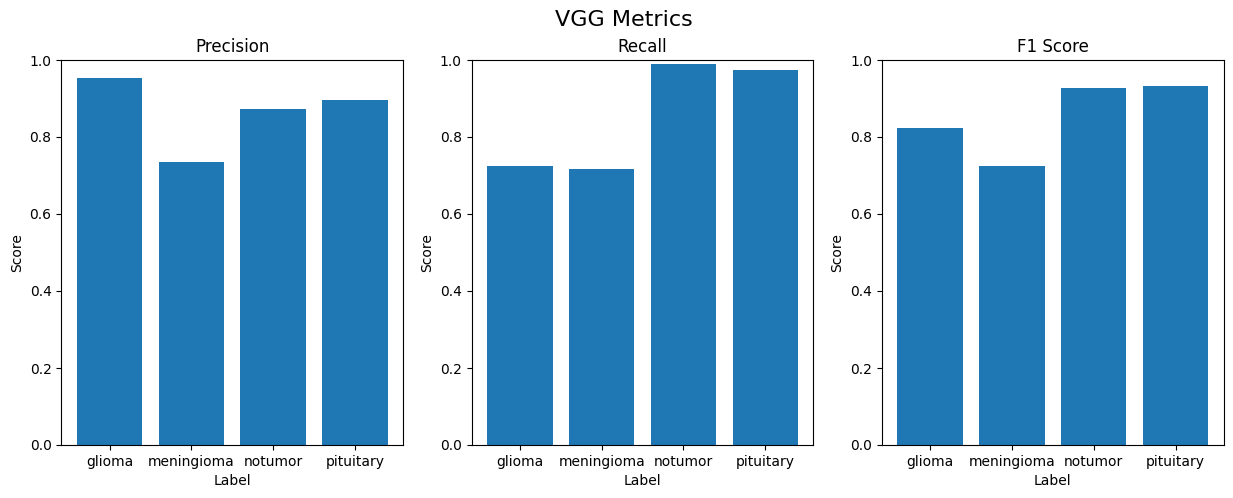

In [37]:
plot_results(output, vgg.test_ds.class_names, "VGG Metrics")
